In [27]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
import requests 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.tokenize import RegexpTokenizer
!pip install nltk


import warnings
warnings.filterwarnings("ignore")

#### Extraemos comentarios de clientes de un alojamiento incluido en nuestro dataset, aplicando el método de Web Scraping utilizando Beatiful Soup (Realizado el día 7 de abril de 2023). 
Camping Caledonia
 Antiga Carretera Nacional 340 Km 1172, 43008 Tamarit, España 
+ A este texto le aplicaremos análisis de sentimiento.

In [16]:
url='https://www.booking.com/hotel/es/camping-caledonia.es.html?aid=397594&label=gog235jc-1FCAEoggI46AdIClgDaEaIAQGYAQq4AQfIAQzYAQHoAQH4AQOIAgGoAgO4At_b5aAGwAIB0gIkMjlmODkyN2EtYTczMi00Y2IxLWFiMDAtMDEwMjhiNmUzYWM52AIF4AIB&sid=78acd339eff5a24ffe748869e8295262&age=4;age=8;all_sr_blocks=30533611_301935100_5_0_0;checkin=2023-07-03;checkout=2023-07-09;dest_id=1389;dest_type=region;dist=0;group_adults=2;group_children=2;hapos=2;highlighted_blocks=30533611_301935100_5_0_0;hpos=2;matching_block_id=30533611_301935100_5_0_0;no_rooms=1;req_adults=2;req_age=4;req_age=8;req_children=2;room1=A%2CA%2C4%2C8;sb_price_type=total;sr_order=popularity;sr_pri_blocks=30533611_301935100_5_0_0__76584;srepoch=1680902700;srpvid=d3a395f7299e00e7;type=total;ucfs=1&#tab-reviews'


In [17]:
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

In [22]:
#Extraemos los comentarios de los clientes al alojamiento
hotel_elements=soup.find_all("div", class_="c9545e7647")
hotel_elements

[<div class="c9545e7647"><div class="db29ecfbe2 c688f151a2"><span>“</span>Localización, entorno natural, personal, atención, actividades, que permitan mascotas<span>”</span></div></div>,
 <div class="c9545e7647"><div class="db29ecfbe2 c688f151a2"><span>“</span>Gente muy amable y cordial. Instalaciones bien pero sin secadores en los lavabos. Buena animación.<span>”</span></div></div>,
 <div class="c9545e7647"><div class="db29ecfbe2 c688f151a2"><span>“</span>Es la segunda vez que vamos. 
 Nos hemos alojado en una tienda Safari. Super bonitas, cómodas y a los críos les encantó que haya animales. Animo a mantenerlos y poner más. 
 Súper bonito el paseo fuera del camping por el río. Aunque la salida justo...<span>”</span></div></div>,
 <div class="c9545e7647"><div class="db29ecfbe2 c688f151a2"><span>“</span>el espacio tan grande, comodidad y sobretodo el  espacio de la terraza y la posición que daba todo el día el sol, la tranquilidad que había<span>”</span></div></div>,
 <div class="c9545e

In [28]:
#Extraemos sólo el texto 
hotel_elements = soup.find_all("div", class_="c9545e7647")
for element in hotel_elements:
    print(element.text)


“Localización, entorno natural, personal, atención, actividades, que permitan mascotas”
“Gente muy amable y cordial. Instalaciones bien pero sin secadores en los lavabos. Buena animación.”
“Es la segunda vez que vamos. 
Nos hemos alojado en una tienda Safari. Super bonitas, cómodas y a los críos les encantó que haya animales. Animo a mantenerlos y poner más. 
Súper bonito el paseo fuera del camping por el río. Aunque la salida justo...”
“el espacio tan grande, comodidad y sobretodo el  espacio de la terraza y la posición que daba todo el día el sol, la tranquilidad que había”
“la estancia muy tranquila y bien ubicado dentro del camping”
“Todo súper limpio que para mí es esencial, trato agradable con el personal que trabaja en el.”
“Estaba todo súper bien limpio y era un bungalow pequeñito pero muy acogedor”
“Camping muy tranquilo, y personal muy a y atento. La cabaña Bali, muy bonita con la terraza, aunque para ir con un niño cuando hace frío, quizá no sea el mejor alojamiento. Nos cam

In [31]:
text=""""“Localización, entorno natural, personal, atención, actividades, que permitan mascotas”
“Gente muy amable y cordial. Instalaciones bien pero sin secadores en los lavabos. Buena animación.”
“Es la segunda vez que vamos. 
Nos hemos alojado en una tienda Safari. Super bonitas, cómodas y a los críos les encantó que haya animales. Animo a mantenerlos y poner más. 
Súper bonito el paseo fuera del camping por el río. Aunque la salida justo...”
“el espacio tan grande, comodidad y sobretodo el  espacio de la terraza y la posición que daba todo el día el sol, la tranquilidad que había”
“la estancia muy tranquila y bien ubicado dentro del camping”
“Todo súper limpio que para mí es esencial, trato agradable con el personal que trabaja en el.”
“Estaba todo súper bien limpio y era un bungalow pequeñito pero muy acogedor”
“Camping muy tranquilo, y personal muy a y atento. La cabaña Bali, muy bonita con la terraza, aunque para ir con un niño cuando hace frío, quizá no sea el mejor alojamiento. Nos cambiaron a una villa y estuvimos muy cómodos.”
“Primer fin de semana que vamos de la temporada y muy agusto como siempre, pensando en volver pronto de nuevo”
“EL bungalow esta bien equipado, una pena el suplemento por sabanas y toallas que cada vez esta mas de moda en este tipo de alojamientos, el camping en general muy bien, mucha cuesta y pendientes, pero las instalaciones, sobretodo los baños, recién...”"""

### Tokenización de oraciones
El tokenizador de oraciones divide el párrafo de texto en oraciones.

In [32]:
nltk.download('punkt')
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['"“Localización, entorno natural, personal, atención, actividades, que permitan mascotas”\n“Gente muy amable y cordial.', 'Instalaciones bien pero sin secadores en los lavabos.', 'Buena animación.”\n“Es la segunda vez que vamos.', 'Nos hemos alojado en una tienda Safari.', 'Super bonitas, cómodas y a los críos les encantó que haya animales.', 'Animo a mantenerlos y poner más.', 'Súper bonito el paseo fuera del camping por el río.', 'Aunque la salida justo...”\n“el espacio tan grande, comodidad y sobretodo el  espacio de la terraza y la posición que daba todo el día el sol, la tranquilidad que había”\n“la estancia muy tranquila y bien ubicado dentro del camping”\n“Todo súper limpio que para mí es esencial, trato agradable con el personal que trabaja en el.”\n“Estaba todo súper bien limpio y era un bungalow pequeñito pero muy acogedor”\n“Camping muy tranquilo, y personal muy a y atento.', 'La cabaña Bali, muy bonita con la terraza, aunque para ir con un niño cuando hace frío, quizá no s

[nltk_data] Downloading package punkt to /Users/natalia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Tokenización de palabras
El tokenizador de palabras divide el párrafo de texto en palabras.

In [35]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['``', '“', 'Localización', ',', 'entorno', 'natural', ',', 'personal', ',', 'atención', ',', 'actividades', ',', 'que', 'permitan', 'mascotas', '”', '“', 'Gente', 'muy', 'amable', 'y', 'cordial', '.', 'Instalaciones', 'bien', 'pero', 'sin', 'secadores', 'en', 'los', 'lavabos', '.', 'Buena', 'animación.', '”', '“', 'Es', 'la', 'segunda', 'vez', 'que', 'vamos', '.', 'Nos', 'hemos', 'alojado', 'en', 'una', 'tienda', 'Safari', '.', 'Super', 'bonitas', ',', 'cómodas', 'y', 'a', 'los', 'críos', 'les', 'encantó', 'que', 'haya', 'animales', '.', 'Animo', 'a', 'mantenerlos', 'y', 'poner', 'más', '.', 'Súper', 'bonito', 'el', 'paseo', 'fuera', 'del', 'camping', 'por', 'el', 'río', '.', 'Aunque', 'la', 'salida', 'justo', '...', '”', '“', 'el', 'espacio', 'tan', 'grande', ',', 'comodidad', 'y', 'sobretodo', 'el', 'espacio', 'de', 'la', 'terraza', 'y', 'la', 'posición', 'que', 'daba', 'todo', 'el', 'día', 'el', 'sol', ',', 'la', 'tranquilidad', 'que', 'había', '”', '“', 'la', 'estancia', 'muy', 't

### Distribución de frecuencias
La distribución de frecuencia de palabras es una técnica común en el análisis de texto y se utiliza para identificar las palabras más comunes en un corpus de texto.

In [36]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 156 samples and 290 outcomes>


In [37]:
#Palabras que más se repiden, en orden descendiente.
fdist.most_common(10)


[(',', 20),
 ('y', 13),
 ('“', 10),
 ('”', 10),
 ('el', 10),
 ('que', 9),
 ('muy', 9),
 ('.', 9),
 ('la', 8),
 ('en', 6)]

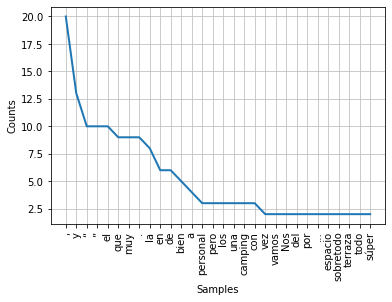

In [38]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#### El conjunto de palabras de detención ("stop words") en NLTK está disponible solo para el idioma inglés. No es posible utilizar stopwords en español sin hacer algunas modificaciones en el código. Debemos crear una  lista de palabras de detención para español y utilizarla para eliminar esas palabras de un texto.

In [45]:
# Importar librería de expresiones regulares
import re

# Definir lista de palabras de detención en español
stop_words = set(['de', 'la', 'el', 'los', 'las', 'del', 'al', 'un', 'una', 'para', 'por', 'con', 'sin', 'sobre', 'entre', 'hacia', 'desde', 'durante', 'ante', 'bajo', 'tras'])


# Convertir el texto en una lista de palabras
palabras = text.split()

# Eliminar las palabras de detención de la lista de palabras
palabras_limp = [palabra for palabra in palabras if not palabra.lower() in stop_words]

# Unir las palabras limpias para formar un nuevo texto sin palabras de detención
texto_limp = " ".join(palabras_limp)

# Imprimir el texto limpio
print(texto_limp)


"“Localización, entorno natural, personal, atención, actividades, que permitan mascotas” “Gente muy amable y cordial. Instalaciones bien pero secadores en lavabos. Buena animación.” “Es segunda vez que vamos. Nos hemos alojado en tienda Safari. Super bonitas, cómodas y a críos les encantó que haya animales. Animo a mantenerlos y poner más. Súper bonito paseo fuera camping río. Aunque salida justo...” “el espacio tan grande, comodidad y sobretodo espacio terraza y posición que daba todo día sol, tranquilidad que había” “la estancia muy tranquila y bien ubicado dentro camping” “Todo súper limpio que mí es esencial, trato agradable personal que trabaja en el.” “Estaba todo súper bien limpio y era bungalow pequeñito pero muy acogedor” “Camping muy tranquilo, y personal muy a y atento. cabaña Bali, muy bonita terraza, aunque ir niño cuando hace frío, quizá no sea mejor alojamiento. Nos cambiaron a villa y estuvimos muy cómodos.” “Primer fin semana que vamos temporada y muy agusto como siemp

In [46]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['``', '“', 'Localización', ',', 'entorno', 'natural', ',', 'personal', ',', 'atención', ',', 'actividades', ',', 'que', 'permitan', 'mascotas', '”', '“', 'Gente', 'muy', 'amable', 'y', 'cordial', '.', 'Instalaciones', 'bien', 'pero', 'sin', 'secadores', 'en', 'los', 'lavabos', '.', 'Buena', 'animación.', '”', '“', 'Es', 'la', 'segunda', 'vez', 'que', 'vamos', '.', 'Nos', 'hemos', 'alojado', 'en', 'una', 'tienda', 'Safari', '.', 'Super', 'bonitas', ',', 'cómodas', 'y', 'a', 'los', 'críos', 'les', 'encantó', 'que', 'haya', 'animales', '.', 'Animo', 'a', 'mantenerlos', 'y', 'poner', 'más', '.', 'Súper', 'bonito', 'el', 'paseo', 'fuera', 'del', 'camping', 'por', 'el', 'río', '.', 'Aunque', 'la', 'salida', 'justo', '...', '”', '“', 'el', 'espacio', 'tan', 'grande', ',', 'comodidad', 'y', 'sobretodo', 'el', 'espacio', 'de', 'la', 'terraza', 'y', 'la', 'posición', 'que', 'daba', 'todo', 'el', 'día', 'el', 'sol', ',', 'la', 'tranquilidad', 'que', 'había', '”', '“', 'la', '

In [47]:
print(len(tokenized_word))
print(len(filtered_sent))

290
247


##### Stemming es un proceso de normalización lingüística, que reduce las palabras a su palabra raíz o elimina los afijos derivativos.

In [48]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['``', '“', 'Localización', ',', 'entorno', 'natural', ',', 'personal', ',', 'atención', ',', 'actividades', ',', 'que', 'permitan', 'mascotas', '”', '“', 'Gente', 'muy', 'amable', 'y', 'cordial', '.', 'Instalaciones', 'bien', 'pero', 'secadores', 'en', 'lavabos', '.', 'Buena', 'animación.', '”', '“', 'Es', 'segunda', 'vez', 'que', 'vamos', '.', 'Nos', 'hemos', 'alojado', 'en', 'tienda', 'Safari', '.', 'Super', 'bonitas', ',', 'cómodas', 'y', 'a', 'críos', 'les', 'encantó', 'que', 'haya', 'animales', '.', 'Animo', 'a', 'mantenerlos', 'y', 'poner', 'más', '.', 'Súper', 'bonito', 'paseo', 'fuera', 'camping', 'río', '.', 'Aunque', 'salida', 'justo', '...', '”', '“', 'espacio', 'tan', 'grande', ',', 'comodidad', 'y', 'sobretodo', 'espacio', 'terraza', 'y', 'posición', 'que', 'daba', 'todo', 'día', 'sol', ',', 'tranquilidad', 'que', 'había', '”', '“', 'estancia', 'muy', 'tranquila', 'y', 'bien', 'ubicado', 'dentro', 'camping', '”', '“', 'Todo', 'súper', 'limpio', 'que', '

###### La lematización reduce las palabras a su palabra base, que es lemas lingüísticamente correctos. Transforma raíces de palabras con el uso de vocabulario y análisis morfológico.

In [49]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/natalia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/natalia/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [51]:
from nltk.stem import WordNetLemmatizer

# Descargar los recursos necesarios de NLTK
nltk.download('punkt')


# Inicializar el lematizador de WordNet
lemmatizer = WordNetLemmatizer()


# Tokenizar el texto en palabras
palabras = nltk.word_tokenize(text)

# Lematizar cada palabra
lemas = [lemmatizer.lemmatize(palabra) for palabra in palabras]

# Unir los lemas en un nuevo texto
texto_lematizado = ' '.join(lemas)

print(texto_lematizado)

[nltk_data] Downloading package punkt to /Users/natalia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


`` “ Localización , entorno natural , personal , atención , actividades , que permitan mascotas ” “ Gente muy amable y cordial . Instalaciones bien pero sin secadores en los lavabo . Buena animación. ” “ Es la segunda vez que vamos . Nos hemos alojado en una tienda Safari . Super bonitas , cómodas y a los críos le encantó que haya animales . Animo a mantenerlos y poner más . Súper bonito el paseo fuera del camping por el río . Aunque la salida justo ... ” “ el espacio tan grande , comodidad y sobretodo el espacio de la terraza y la posición que daba todo el día el sol , la tranquilidad que había ” “ la estancia muy tranquila y bien ubicado dentro del camping ” “ Todo súper limpio que para mí e esencial , trato agradable con el personal que trabaja en el. ” “ Estaba todo súper bien limpio y era un bungalow pequeñito pero muy acogedor ” “ Camping muy tranquilo , y personal muy a y atento . La cabaña Bali , muy bonita con la terraza , aunque para ir con un niño cuando hace frío , quizá no

In [52]:
print (len(text))
print (len(texto_lematizado))

1409
1454


##### Analisis de sentimientos 

Los comentarios de los clientes de alojamientos turísticos pueden expresar una amplia gama de sentimientos y emociones.
Es importante tener en cuenta que la opinión de cada cliente es única y puede variar en función de su experiencia personal y de sus expectativas. 

In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar los recursos necesarios de NLTK
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento 
analyzer = SentimentIntensityAnalyzer()


# Obtener el puntaje de sentimiento
scores = analyzer.polarity_scores(text)

# Imprimir el puntaje de sentimiento
print(scores)

{'neg': 0.025, 'neu': 0.947, 'pos': 0.028, 'compound': 0.1531}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/natalia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


El resultado del análisis de sentimiento muestra que el texto tiene una polaridad neutra, ya que el valor de 'neu' es 0.947. Esto significa que el texto no tiene un sesgo positivo o negativo muy marcado, sino que es más bien neutral en cuanto a su contenido emocional.

El valor de 'pos' es 0.028, lo que indica que hay una ligera presencia de sentimientos positivos en el texto, pero no son muy fuertes. Por otro lado, el valor de 'neg' es 0.025, lo que indica que hay una ligera presencia de sentimientos negativos en el texto, pero tampoco son muy fuertes.

El valor de 'compound' es 0.1531, lo que indica que el texto tiene una polaridad positiva muy leve. Este valor se obtiene a partir de un algoritmo que combina los valores de 'pos', 'neg' y 'neu' para obtener una puntuación general que representa la polaridad del texto.

En general, se puede interpretar que el texto analizado tiene un tono emocional neutral con una ligera presencia de sentimientos positivos y negativos. 